In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import nibabel as nib # supports a collection of neuroimaging file formats
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

import seaborn as sns
sns.set_style('ticks')

In [12]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, sli in enumerate(slices):
        axes[i].imshow(sli.T, cmap="gray", origin="lower")

In [13]:
sub_04_filename = os.path.join(os.getcwd(), "ds003688-download", "sub-04", "ses-mri3t", "func",\
                               "sub-04_ses-mri3t_task-film_run-1_bold.nii.gz")
sub_04 = nib.load(sub_04_filename)
sub_04_data = sub_04.get_fdata()
sub_04_data.shape

(40, 64, 64, 641)

In [14]:
slice_0 = sub_04_data[20, :, :, 100]
slice_1 = sub_04_data[:, 32, :, 100]
slice_2 = sub_04_data[:, :, 32, 100]

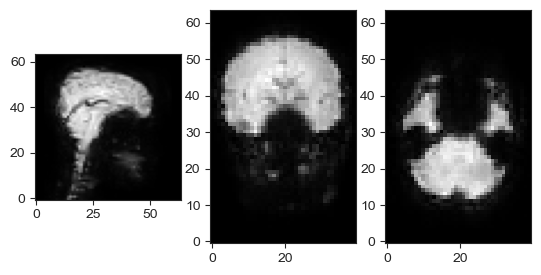

In [15]:
show_slices([slice_0, slice_1, slice_2])

In [16]:
sub_04_data_normalized = (sub_04_data - sub_04_data.min()) / (sub_04_data.max() - sub_04_data.min())
sub_04_data_reversed = 1 - sub_04_data_normalized

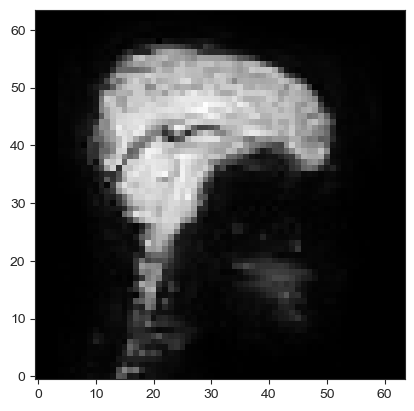

In [17]:
plt.imshow(sub_04_data_normalized[20, :, :, 100].T, cmap="gray", origin="lower")

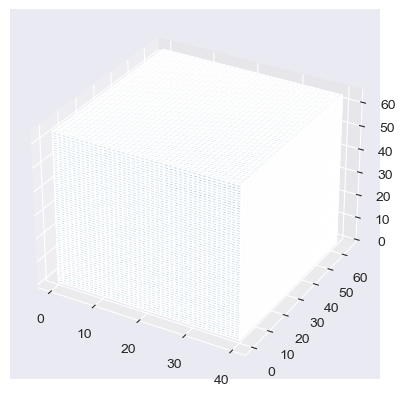

In [9]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(sub_04_data_reversed[:, :, :, 0], facecolors='#1f77b430');

In [18]:
def explore_3d_image(layer):
    plt.figure(figsize=(10, 15))
    plt.imshow(sub_04_data[:, :, layer, 100], cmap="gray")
    plt.title("Explore layers of brain fMRI", family="Arial", fontsize=20)
    plt.axis('off')
    return layer

In [19]:
interact(explore_3d_image, layer=(0, sub_04_data.shape[2] - 1))

interactive(children=(IntSlider(value=31, description='layer', max=63), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3d_image(layer)>

In [21]:
import torch

In [22]:
img_orig = torch.from_numpy(np.asanyarray(nib.load(sub_04_filename).dataobj)).to(dtype=torch.float32)

In [24]:
background = img_orig == 0

In [25]:
img_temp = (img_orig - img_orig[~background].mean()) / (img_orig[~background].std())

In [27]:
img = torch.empty(img_orig.shape)

In [28]:
img[background] = img_temp.min()
img[~background] = img_temp[~background]

In [30]:
interact(explore_3d_image, layer=(0, img.shape[2] - 1))

interactive(children=(IntSlider(value=31, description='layer', max=63), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3d_image(layer)>

In [71]:
import cv2
import IPython.display as ipd

import subprocess

In [72]:
video_file = os.path.join(os.getcwd(), "Film stimulus.mp4")

In [73]:
# Load in video capture
videocap = cv2.VideoCapture(video_file)

In [74]:
height = videocap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = videocap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f"Height: {height}, Width: {width}")

Height: 480.0, Width: 640.0


In [75]:
fps = videocap.get(cv2.CAP_PROP_FPS)
print(f"FPS: {fps}")

FPS: 25.002564365575957


In [77]:
# success: true/ false; true denotes that an image has been loaded
# image: the actual image data if success = true; if success = false, image is NULL
success, frame = videocap.read()
count = 1
while success:
  cv2.imwrite(os.path.join(os.getcwd(), "frames", f"frame_{count}.jpg"), frame)    
  success, frame = videocap.read()
  print("Saved frame", count)
  count += 1

Saved frame 1
Saved frame 2
Saved frame 3
Saved frame 4
Saved frame 5
Saved frame 6
Saved frame 7
Saved frame 8
Saved frame 9
Saved frame 10
Saved frame 11
Saved frame 12
Saved frame 13
Saved frame 14
Saved frame 15
Saved frame 16
Saved frame 17
Saved frame 18
Saved frame 19
Saved frame 20
Saved frame 21
Saved frame 22
Saved frame 23
Saved frame 24
Saved frame 25
Saved frame 26
Saved frame 27
Saved frame 28
Saved frame 29
Saved frame 30
Saved frame 31
Saved frame 32
Saved frame 33
Saved frame 34
Saved frame 35
Saved frame 36
Saved frame 37
Saved frame 38
Saved frame 39
Saved frame 40
Saved frame 41
Saved frame 42
Saved frame 43
Saved frame 44
Saved frame 45
Saved frame 46
Saved frame 47
Saved frame 48
Saved frame 49
Saved frame 50
Saved frame 51
Saved frame 52
Saved frame 53
Saved frame 54
Saved frame 55
Saved frame 56
Saved frame 57
Saved frame 58
Saved frame 59
Saved frame 60
Saved frame 61
Saved frame 62
Saved frame 63
Saved frame 64
Saved frame 65
Saved frame 66
Saved frame 67
Save

In [109]:
import cv2
import torchvision.transforms as transforms

In [110]:
frame_path = os.path.join(os.getcwd(), "frames", "frame_1.jpg")

# Read the image
frame = cv2.imread(frame_path)
  
# Convert BGR image to RGB image
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  
# Define a transform to convert
# the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])
  
# Convert the image to Torch tensor
tensor = transform(frame)
  
# print the converted image tensor
print(tensor)

tensor([[[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.

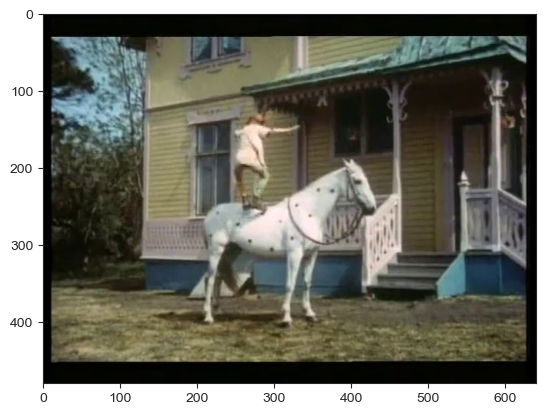

In [113]:
plt.imshow(frame)